### Oppgave 3) Databehandling

Målet med analysen av temperaturdataen er å se etter trender som kan si noe om endringer over tid. Dermed er det viktig at datasettet er fullstendig og ikke inneholder feildata. Nedenfor sjekkes datasettet som ble hentet ut av APIen og et manipulert datasett hvor noen av målingene er urealistisk og noen målinger er fjernet. Videre tar koden og fyller inn de manglende verdiene, samt og interpolerer slik at man får et best mulig estimat av reel temperatur

In [4]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src', 'temperaturdata')))
import databehandling

# Manglende verdier
databehandling.sjekk_manglende_verdier_rentdatasett()
databehandling.sjekk_manglende_verdier_feildatasett()

# Feilverdier
databehandling.sjekk_feilverdier_rentdatasett()
databehandling.sjekk_feilverdier_feildatasett()

df_interpolert = databehandling.fyll_manglende_verdier("temperaturdata_feilverdier.csv", metode="interpolasjon")

df_korrigert_rent = databehandling.korriger_urealistiske_verdier("temperaturdata.csv")
df_korrigert_feil = databehandling.korriger_urealistiske_verdier("temperaturdata_feilverdier.csv")


🧪 (Rent datasett) Manglende verdier i 'temperature_2m': 0
🧪 (Feildatasett) Manglende verdier i 'temperature_2m': 0
🚨 (Rent datasett) Feilverdier utenfor [-40.0, 40.0]: 0
🚨 (Feildatasett) Feilverdier utenfor [-40.0, 40.0]: 2
🛠️ Manglende verdier i 'temperature_2m' håndtert med metode: interpolasjon
🧼 Urealistiske verdier i 'temperature_2m' erstattet og interpolert innenfor [-40.0, 40.0]
🧼 Urealistiske verdier i 'temperature_2m' erstattet og interpolert innenfor [-40.0, 40.0]


Pandas identifiserer kolonnene hvor de urealistiske verdiene ligger. Videre visualiseres det i koden nedenfor, hvordan de urealistiske verdiene blir omgjort til NaNs og deretter interpoleres for å bli en realistisk verdi. List comprehentions brukes til å bytte de urealistiske verdiene, og pandas gjør selve interpoleringen

🛠️ Manglende verdier i 'temperature_2m' håndtert med metode: interpolasjon
🧼 Urealistiske verdier i 'temperature_2m' erstattet og interpolert innenfor [-40.0, 40.0]


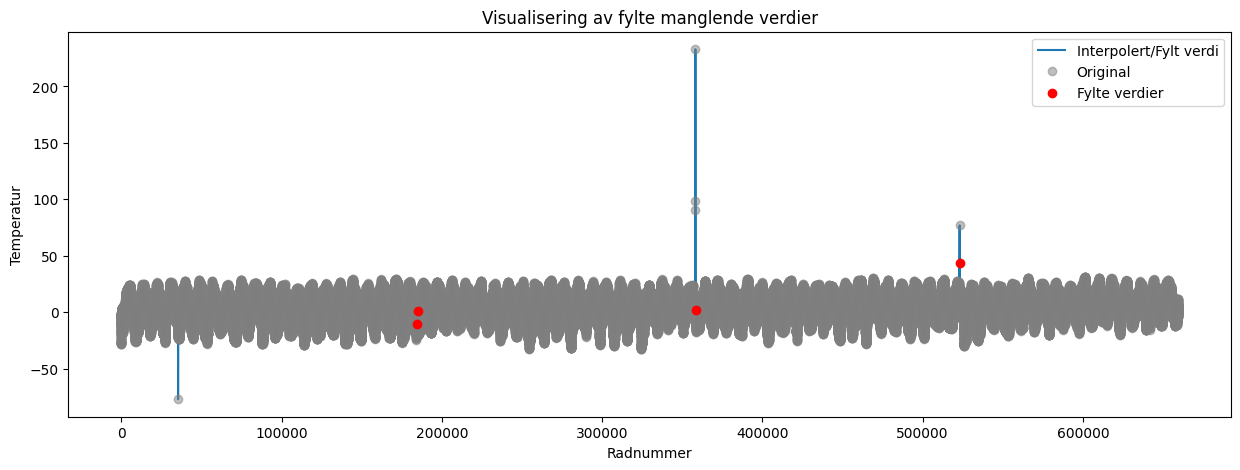

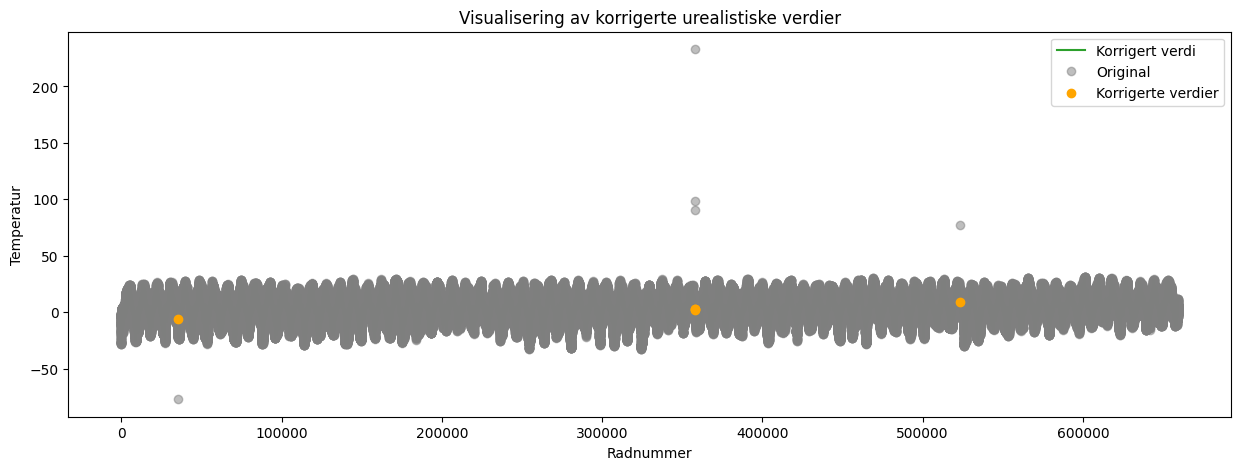

In [3]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src', 'temperaturdata')))
import databehandling

databehandling.vis_endringer_i_data()


Grafene over visualiserer, hvor de korrigerte verdiene blir gjort, og neste kode viser i tabellform alle feilverdier, og deretter korrigert

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src', 'temperaturdata')))
import databehandling

databehandling.vis_endringer_med_dato()


🧼 Urealistiske verdier i 'temperature_2m' erstattet og interpolert innenfor [-40.0, 40.0]
Rader med endring (med dato/tid):


c:\Users\Even\TDT4114-Prosjekt\src\temperaturdata\databehandling.py:251: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datoer = pd.date_range(start=startdato, periods=len(df_feil), freq='H')


,Dato/tid,Original,Korrigert
0,1954-01-18 04:00:00,-77.0,-5.677
1,1971-01-31 22:00:00,NaN,-10.002
2,1971-02-10 01:00:00,NaN,0.823
3,1990-11-13 14:00:00,233.0,2.723
4,1990-11-14 19:00:00,91.0,2.673
5,1990-11-15 15:00:00,99.0,2.348
6,1990-11-16 11:00:00,NaN,1.923
7,2009-09-04 02:00:00,77.0,8.998
8,2009-09-04 03:00:00,NaN,9.298


For å se at disse verdiene kan være reelle må de sammenlignes med det feilfrie datasettet, og dermed kan vi validere interpoleringen, dersom verdiene ser ut til å stemme

In [2]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src', 'temperaturdata')))
import databehandling

databehandling.sammenlign_med_rent_datasett()


🧼 Urealistiske verdier i 'temperature_2m' erstattet og interpolert innenfor [-40.0, 40.0]
Sammenligning av korrigerte rader mot rent datasett:


c:\Users\Even\TDT4114-Prosjekt\src\temperaturdata\databehandling.py:282: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datoer = pd.date_range(start=startdato, periods=len(df_feil), freq='H')


,Dato/tid,Original (feil),Korrigert,Rent datasett
0,1954-01-18 04:00:00,-77.0,-5.677,-5.852000
1,1971-01-31 22:00:00,NaN,-10.002,-10.352000
2,1971-02-10 01:00:00,NaN,0.823,0.898000
3,1990-11-13 14:00:00,233.0,2.723,2.798000
4,1990-11-14 19:00:00,91.0,2.673,3.248000
5,1990-11-15 15:00:00,99.0,2.348,2.498000
6,1990-11-16 11:00:00,NaN,1.923,1.848000
7,2009-09-04 02:00:00,77.0,8.998,8.648000
8,2009-09-04 03:00:00,NaN,9.298,8.997999
